# Logistic Regression

Logistic regression tackles classification problems where the values of the outputs are discrete values (i.e 1, 2, 3,...).

Using linear regression is not suitable for classification problems because:

- Linear regression predicts continuous outputs
- Linear regression is prone to incorrect classification when new data points are added
- Linear regression predicts outputs beyond the range of outputs of 0 and 1 (for binary classification)

Consider the following scenario:

## Binary Logistic Regression

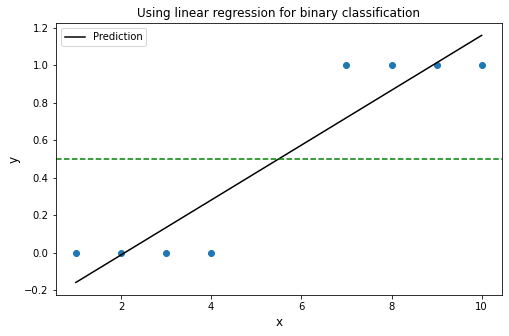

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


x = np.array([1, 2, 3, 4, 7, 8, 9, 10]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1]).reshape(-1,1)

lin_model = LinearRegression()
lin_model.fit(x,y)
lin_y_pred = lin_model.predict(x)

plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.plot(x, lin_y_pred, color='black', label="Prediction")
plt.axhline(y=0.5, color='g', linestyle='--')
plt.title("Using linear regression for binary classification")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend()

In [2]:
#Predict this new data point (5.5, 1)
x_test = np.array([5.5]).reshape(-1,1)

y_pred = lin_model.predict(x_test)
y_pred

array([[0.5]])

Given that the values of y can only be 0 or 1(discrete),

Yet based on the best fit line shown, it is possible to obtain predicted continuous values of y that are between 0 and 1.

Another issue arises because the best fit line can predict values of y beyond 1 and 0, even going into negative values.

A reasonable conclusion that one can make is that because the values of y lie between 0 and 1 inclusive, predicted values of y that are < 0.5 correspond to "y=0", and predicted values of y that are >= 0.5 should correspond to "y=1". 

The threshold y-value set at 0.5 gives a corresponding x-value of around 5.5. This suggests that x-values less than 5.5 should be classified as "y=0" and x-values more than 5.5 should be classified as "y=1"

Consider a new data point (20, 1):

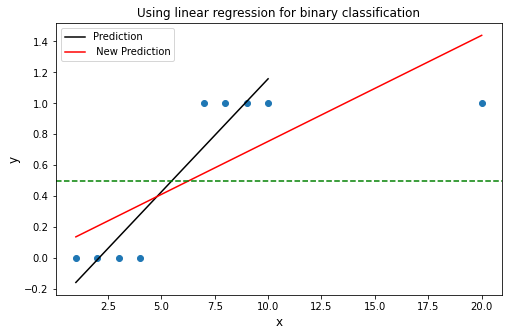

In [3]:
#Hardcode data
x_new = np.array([1, 2, 3, 4, 7, 8, 9, 10, 20]).reshape(-1,1)
y_new = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(-1,1)

lin_model_new = LinearRegression()
lin_model_new.fit(x_new,y_new)
lin_y_pred_new = lin_model_new.predict(x_new)

plt.figure(figsize=(8,5))
plt.scatter(x_new, y_new)
plt.plot(x, lin_y_pred, color='black', label="Prediction")
plt.plot(x_new, lin_y_pred_new, color='red', label=" New Prediction")
plt.axhline(y=0.5, color='g', linestyle='--')
plt.title("Using linear regression for binary classification")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend()

In [4]:
#Predict on that same datapoint
y_pred = lin_model_new.predict(x_test)
y_pred

array([[0.44504132]])

(20, 1) results in a new best fit line as shown above.

If we were to still use the threshold of y=0.5 to classify datapoints, it will result in mislabelled datapoints. Note that the datapoint(5.5,1) that was intially classified as "y=1", is will now be classified as "y=0".

A more suitable hypothesis would be:

$$
\hat{y} = g(\beta^T x) = \frac{1}{1 + e^{- \beta^T x}}
$$

where

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

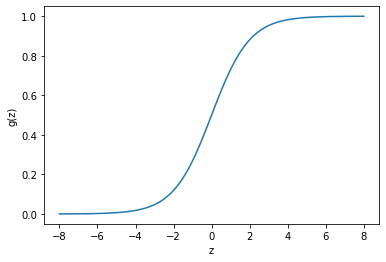

In [5]:
#Visualize sigmoid
x = np.linspace(-8, 8, 100)
y = 1/(1 + np.exp(-x))
  
plt.plot(x, y)
plt.xlabel("z")
plt.ylabel("g(z)")
plt.show()

### Cost Function

If we were to adopt the cost function similar to that of linear regression, we would obtain the following:

$$
J(\beta) = \frac{1}{N} \sum_{j=1}^{N}Cost(\hat{y}, y)
$$

where

$$ 
Cost(\hat{y}, y)= \frac{1}{2} (\hat{y} - y)^2
$$

However, due to non-linear sigmoid function, the logitistic regression $\hat{y}$ is non-convex (v.s linear regression which is always convex), it means that gradient descent is not guaranteed to reach a global minimum.

A new cost function can be written as:

$$ 
Cost(\hat{y}, y)=   \left\{
\begin{array}{ll}
      -log(\hat{y}) & \text{if $y=1$} \\
      -log(1 - \hat{y}) & \text{if $y=0$} \\
\end{array} 
\right.
$$


<ipython-input-6-d9f3f147aafe>:4: RuntimeWarning: invalid value encountered in log10
  y1 = -np.log10(x)
<ipython-input-6-d9f3f147aafe>:10: RuntimeWarning: invalid value encountered in log10
  y2 = -np.log10(1-x)


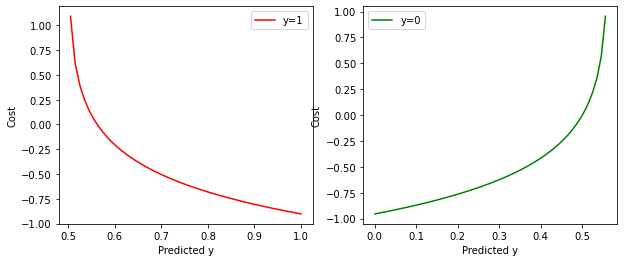

In [6]:
#Visualise
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
x1 = np.linspace(0, 1, 100)
y1 = -np.log10(x)
ax1.plot(x1, y1, color='red', label="y=1")
ax1.set(xlabel='Predicted y',ylabel='Cost')
ax1.legend()
  
x2 = np.linspace(0, 1, 100)
y2 = -np.log10(1-x)
ax2.plot(x2, y2, color='green', label="y=0")
ax2.set(xlabel='Predicted y',ylabel='Cost')
ax2.legend()

Intuition:
- If $(predicted  P(y=1|x;\theta) = 0)$ when it is actually 1, then the cost incurred is very high (red curve)
- If $(predicted  P(y=0|x;\theta) = 1)$ when it is actually 0, then the cost incurred is very high (green curve)

<br>

Combining the 2 cases together:
$$
Cost(\hat{y}, y) = -ylog(\hat{y}) - (1-y)log(1-\hat{y})
$$

If y = 1:
$$
Cost(\hat{y}, y) = -log(\hat{y})
$$

If y = 0
$$
Cost(\hat{y}, y) = -log(1-\hat{y})
$$

## Gradient Ascent

$$
J(\beta) = \frac{1}{N} \sum_{j=1}^{N}Cost(\hat{y}, y)
$$
$$
J(\beta) = - \frac{1}{N} \left[\sum_{j=1}^{N} ylog(\hat{y}) + (1-y)log(1-\hat{y}) \right]
$$

Note that there is now a negative sign in front. 

Instead of minimising the cost function $J(\beta)$ (in gradient descent), we want to maximise it.

This is performed for all values of j, depending on the number of inputs: so all $\beta_0$ to $\beta_p$ will be tuned

$\alpha$ represents the learning rate, or the step length that is used between each update.

For one training example, compute the first-order derivative:

$$
\beta_j := \beta_j + \alpha \frac{\partial}{\partial \beta_j} J(\beta) 
$$

Take ln instead of log for convenience:

$$
\beta_j := \beta_j + \alpha \frac{\partial}{\partial \beta_j} (yln(g(z)) + (1-y)ln(1-g(z)))
$$

$$
\beta_j := \beta_j + \alpha \left[ \frac{\partial}{\partial \beta_j} yln(g(z)) + \frac{\partial}{\partial \beta_j}(1-y)ln(1-g(z)) \right]
$$

$$
\beta_j := \beta_j + \alpha \left[ y\frac{\partial}{\partial \beta_j} ln(g(z)) + (1-y)\frac{\partial}{\partial \beta_j}ln(1-g(z)) \right]
$$

$$
\beta_j := \beta_j + \alpha \left[ y\frac{\frac{\partial g(z)}{\partial \beta_j}}{g(z)} + (1-y)\frac{\frac{\partial (1- g(z))}{\partial \beta_j}}{1-g(z)} \right]
$$

$\frac{\partial (1- g(z))}{\partial \beta_j}$ gives $-\frac{\partial g(z))}{\partial \beta_j}$:

$$
\beta_j := \beta_j + \alpha \left[ y\frac{1}{g(z)} - (1-y)\frac{1}{1-g(z)}\right] \frac{\partial g(z)}{\partial \beta_j}
$$

$g'(z) = g(z)(1-g(z)):$

$$
\beta_j := \beta_j + \alpha \left[ y\frac{1}{g(z)} - (1-y)\frac{1}{1-g(z)}\right] g(z)(1-g(z)) \frac{\partial z}{\partial \beta_j}
$$

$$
\beta_j := \beta_j + \alpha \left( y(1-g(z)) - (1-y)g(z)\right) \frac{\partial z}{\partial \beta_j}
$$

$$
\beta_j := \beta_j + \alpha \left( y(1-g(z)) - (1-y)g(z)\right)x_j
$$

Expand:

$$
\beta_j := \beta_j + \alpha \left( y-y(g(z)) - g(z)+y(g(z))\right)x_j
$$

$$
\beta_j := \beta_j + \alpha(y-g(z))x_j
$$


This update is performed simultaneously for all values of j, where j ranges from 1 to p for each of the input variables.

In general, for **N** number of training examples:

$$
\beta_j := \beta_j + \alpha\sum_{i=1}^{N}(y-g(z)) x_j
$$

This looks similar to linear regression, with the exception that g(z) here is the sigmoid function, whereas g(z) would be a linear function in linear regression.

### Stochastic Gradient Descent (SGD)

- Chooses a random example, and updates weights after scanning that example.  


<!-- Repeat until convergence or number of iterations reached for each feature (j) {

$$
\beta_j := \beta_j + \alpha\sum_{i=1}^{N}(y-g(z)) x_j
$$

} -->

Repeat {

    for i = 1,...,N {
        
$$
\beta_j := \beta_j + \alpha(y-g(z)) x_j
$$

for every feature (j)

    }
}

In [7]:
#Import libraries
import numpy as np

#Visualization
import matplotlib.pyplot as plt

#Validation purposes
from sklearn.linear_model import LogisticRegression

In [8]:
class Logistic_Regression():
    
    def __init__(self, n_iterations=100, learning_rate=0.001):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        
    def sigmoid(self, z): 
        return 1 / (1 + np.exp(-z))
        
    def initialize_weights(self, n_features):
        self.w = np.zeros(n_features)

    def fit(self, X, y):
        
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        
        #List of training errors for visualization
        self.training_errors = []
        
        #Initialise weights randomly, number of features should be the number of columns of X
        self.initialize_weights(n_features=X.shape[1])

        # Gradient descent for n_iterations
        # Batch gradient descent: Calculate errors for all training examples, then update weights
        for i in range(self.n_iterations):
            
            y_pred = self.sigmoid(X.dot(self.w))
            
            # Calculate error
            cost = np.mean(-y * np.log(y_pred) - (1-y) * np.log(1 - y_pred))
            
            #Append errors to error list
            self.training_errors.append(cost)
            
            # Gradient of l2 loss w.r.t w
            grad_w = X.T.dot(y_pred - y)
            
            # Update the weights
            self.w -= self.learning_rate * grad_w
            

    def predict(self, X):
        
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        y_pred = np.round(self.sigmoid(X.dot(self.w)))
        return y_pred

In [67]:
class SGD_Logistic_Regression():
    
    def __init__(self, n_epochs=100, learning_rate=0.001, tolerance=1e-20):
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        
    def sigmoid(self, z): 
        return 1 / (1 + np.exp(-z))
        
    def initialize_weights(self, n_features):
        self.w = np.zeros(n_features)

    def fit(self, X, y):
        
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        
        # Get number of training examples
        N = len(X)
        
        #List of training errors for visualization
        self.training_errors = []
        
        #Initialise weights randomly, number of features should be the number of columns of X
        self.initialize_weights(n_features=X.shape[1])
        
        # Stochastic gradient descent for n_epochs
        for i in range(self.n_epochs):
            
            shuffle = np.random.permutation(len(y))
            X = X[shuffle, :]
            y = y[shuffle]
            
            for j in range(N):
                
                y_pred = self.sigmoid(X[j].dot(self.w))
                
                grad_w = X.T.dot(y_pred - y)
            
                # Update the weights
                self.w -= self.learning_rate * grad_w
            
            
            y_pred = self.sigmoid(X.dot(self.w))

            # Calculate error
            cost = np.mean(-y * np.log(y_pred) - (1-y) * np.log(1 - y_pred))
            
            if len(self.training_errors) > 1: #More than one cost recorded
                    if (self.training_errors[-1] - cost) <= self.tolerance:
                        break
            
            #Append errors to error list
            self.training_errors.append(cost)
            

    def predict(self, X):
        
        X = np.insert(X, 0, 1, axis=1)
        y_pred = np.round(self.sigmoid(X.dot(self.w)))
        
        return y_pred

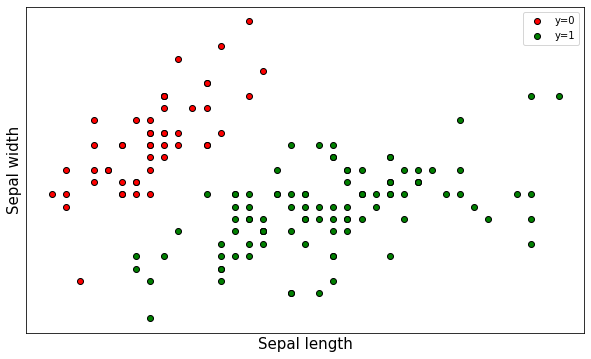

In [59]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.figure(2, figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='r', edgecolor='k', label='y=0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='g', edgecolor='k', label='y=1')
plt.xlabel('Sepal length', fontsize=15)
plt.ylabel('Sepal width', fontsize=15)
plt.xticks(())
plt.yticks(())

plt.legend()

In [71]:
sgd_model = SGD_Logistic_Regression(n_epochs=10000, learning_rate=0.000001)
sgd_model.fit(X,y)

Text(0.5, 0, 'Epochs')

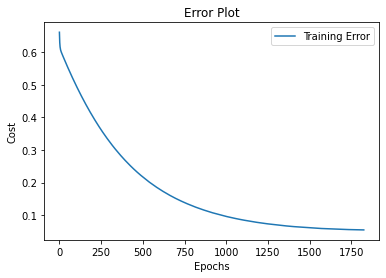

In [72]:
# Training error plot
n = len(sgd_model.training_errors)
plt.plot(range(n), sgd_model.training_errors, label="Training Error")
plt.legend()
plt.title("Error Plot")
plt.ylabel('Cost')
plt.xlabel('Epochs')

In [73]:
sgd_model.w

array([-1.06989422,  5.21553144, -8.34730326])

In [74]:
sgd_y_hat = sgd_model.predict(X)
sgd_y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

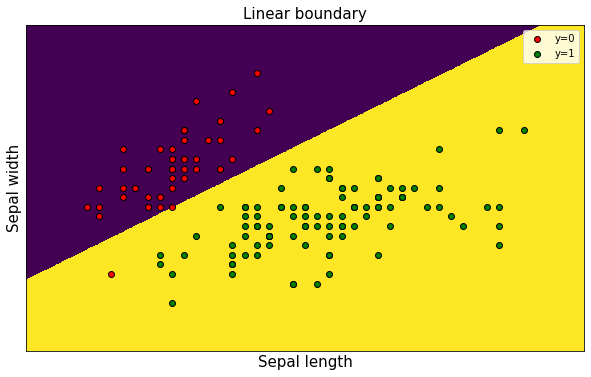

In [87]:
# Plot the decision boundary [2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = sgd_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, shading='auto')

# Plot also the training points
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='r', edgecolor='k', label='y=0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='g', edgecolor='k', label='y=1')
plt.xlabel('Sepal length', fontsize=15)
plt.ylabel('Sepal width', fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Linear boundary', fontsize=15)


plt.legend()

In [83]:
#Using sklearn LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

sk_model = SGDClassifier(loss='log', shuffle=True)

sk_model.fit(X, y)

SGDClassifier(loss='log')

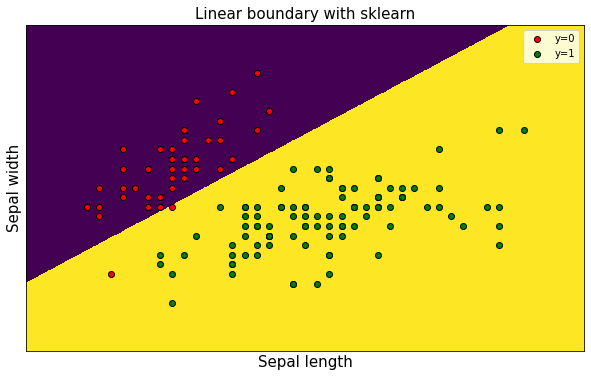

In [88]:
# Plot the decision boundary [2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = sk_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, shading='auto')

# Plot also the training points
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='r', edgecolor='k', label='y=0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='g', edgecolor='k', label='y=1')
plt.xlabel('Sepal length', fontsize=15)
plt.ylabel('Sepal width', fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Linear boundary with sklearn', fontsize=15)


plt.legend()

### References
[1] CS229 Stanford University Notes. By Andrew Ng 

[2] https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py